In [2]:
import keras
keras.__version__

'2.2.2'

## Bu notebookta convnet'ler kullanarak iki ayrı resmi ayırt etmeye çalışacağız. Resimlerimiz batarya ve kapak.

### Toplam 100 resim için 52 train - 24 validation - 24 test olmak üzere bölümlere ayrılmıştır. 
#### Batarya için 26 train - 12 validation - 12 test
#### Kapak için 26 train - 12 validation - 12 test

In [3]:
import os, shutil

In [4]:
#Datasetinin bulunduğu yol
original_dataset_dir = 'C:/Users/MustafaCevik/Desktop/DL_Project/data'

#Datasetin saklanacağı yol
base_dir = 'C:/Users/MustafaCevik/Desktop/DL_Project/lid_battery'
os.mkdir(base_dir)

#Traning, validation ve test dizinlerinin oluşturulması
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_lids_dir = os.path.join(train_dir, 'lids')
os.mkdir(train_lids_dir)

train_batterys_dir = os.path.join(train_dir, 'batterys')
os.mkdir(train_batterys_dir)

validation_lids_dir = os.path.join(validation_dir, 'lids')
os.mkdir(validation_lids_dir)

validation_batterys_dir = os.path.join(validation_dir, 'batterys')
os.mkdir(validation_batterys_dir)

test_lids_dir = os.path.join(test_dir, 'lids')
os.mkdir(test_lids_dir)

test_batterys_dir = os.path.join(test_dir, 'batterys')
os.mkdir(test_batterys_dir)

#İlk 26 kapak resmini train için kopyala
fnames = ['kapak{}.jpg'.format(i) for i in range(26)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_lids_dir, fname)
    shutil.copyfile(src, dst)

# Sonraki 12 kapak resmini validation için kopyala
fnames = ['kapak{}.jpg'.format(i) for i in range(26, 38)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_lids_dir, fname)
    shutil.copyfile(src, dst)
    
# Son 12 kapak resmini de test için kopyala
fnames = ['kapak{}.jpg'.format(i) for i in range(38, 50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_lids_dir, fname)
    shutil.copyfile(src, dst)
    
# Aynı işlemleri batarya resimleri için de yap (ilk 26 train - sonraki 12 validation - son 12 test)
fnames = ['batarya{}.jpg'.format(i) for i in range(26)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_batterys_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['batarya{}.jpg'.format(i) for i in range(26, 38)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_batterys_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['batarya{}.jpg'.format(i) for i in range(38, 50)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_batterys_dir, fname)
    shutil.copyfile(src, dst)

In [5]:
#Kapak resimlerinin train - validation - test sayılarını ekrana yazdır
print('total training lid images:', len(os.listdir(train_lids_dir)))
print('total validation lid images:', len(os.listdir(validation_lids_dir)))
print('total test lid images:', len(os.listdir(test_lids_dir)))

total training lid images: 26
total validation lid images: 12
total test lid images: 12


In [6]:
#Kapak resimlerinin train - validation - test sayılarını ekrana yazdır
print('total training battery images:', len(os.listdir(train_batterys_dir)))
print('total validation battery images:', len(os.listdir(validation_batterys_dir)))
print('total test battery images:', len(os.listdir(test_batterys_dir)))

total training battery images: 26
total validation battery images: 12
total test battery images: 12


#

## Modelimizi Oluşturuyoruz

In [248]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [230]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 99, 99, 32)        0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 313632)            0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                20072512  
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 65        
Total params: 20,073,473
Trainable params: 20,073,473
Non-trainable params: 0
_________________________________________________________________


In [231]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [232]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Resimleri 200x200 piksel olcacak şekilde yeniden boyutlandır
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

Found 52 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [233]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (8, 200, 200, 3)
labels batch shape: (8,)


In [234]:
model.save('lid_battery_1.h5')

In [235]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/8
8/8 [==============================] - 10s 1s/step - loss: 2.3809 - acc: 0.5648 - val_loss: 1.1018 - val_acc: 0.5000
Epoch 2/8
8/8 [==============================] - 7s 864ms/step - loss: 0.8292 - acc: 0.4213 - val_loss: 0.7145 - val_acc: 0.5000
Epoch 3/8
8/8 [==============================] - 7s 844ms/step - loss: 0.6561 - acc: 0.6567 - val_loss: 0.6862 - val_acc: 0.5000
Epoch 4/8
8/8 [==============================] - 7s 867ms/step - loss: 0.5623 - acc: 0.8111 - val_loss: 0.5272 - val_acc: 0.8333
Epoch 5/8
8/8 [==============================] - 7s 842ms/step - loss: 0.5279 - acc: 0.7639 - val_loss: 0.4646 - val_acc: 1.0000
Epoch 6/8
8/8 [==============================] - 7s 844ms/step - loss: 0.5430 - acc: 0.6907 - val_loss: 0.4864 - val_acc: 0.6250
Epoch 7/8
8/8 [==============================] - 7s 880ms/step - loss: 0.3908 - acc: 0.8898 - val_loss: 0.3901 - val_acc: 1.0000
Epoch 8/8
8/8 [==============================] - 7s 859ms/step - loss: 0.3724 - acc: 0.8741 - val_l

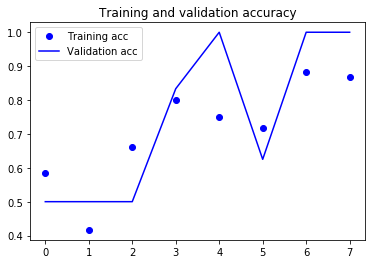

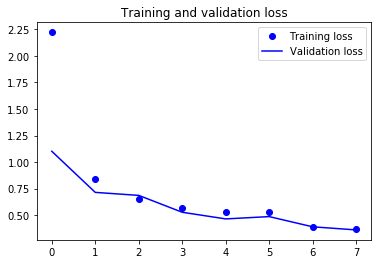

In [236]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#

## Katman ve Düğüm Sayısı Üzerinde Değişiklik Yapma

In [251]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [252]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [253]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Resimleri 200x200 piksel olcacak şekilde yeniden boyutlandır
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

Found 52 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [254]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (8, 200, 200, 3)
labels batch shape: (8,)


In [255]:
model.save('lid_battery_2.h5')

In [256]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/8
8/8 [==============================] - 18s 2s/step - loss: 0.7063 - acc: 0.5000 - val_loss: 0.6952 - val_acc: 0.5000
Epoch 2/8
8/8 [==============================] - 13s 2s/step - loss: 0.6525 - acc: 0.7044 - val_loss: 0.5884 - val_acc: 0.5000
Epoch 3/8
8/8 [==============================] - 14s 2s/step - loss: 0.5409 - acc: 0.7500 - val_loss: 0.4332 - val_acc: 1.0000
Epoch 4/8
8/8 [==============================] - 13s 2s/step - loss: 0.3498 - acc: 0.9048 - val_loss: 0.2168 - val_acc: 1.0000
Epoch 5/8
8/8 [==============================] - 14s 2s/step - loss: 0.1690 - acc: 1.0000 - val_loss: 0.1071 - val_acc: 1.0000
Epoch 6/8
8/8 [==============================] - 13s 2s/step - loss: 0.0711 - acc: 1.0000 - val_loss: 0.0759 - val_acc: 1.0000
Epoch 7/8
8/8 [==============================] - 14s 2s/step - loss: 0.0261 - acc: 1.0000 - val_loss: 0.0272 - val_acc: 1.0000
Epoch 8/8
8/8 [==============================] - 13s 2s/step - loss: 0.0107 - acc: 1.0000 - val_loss: 0.0176 - 

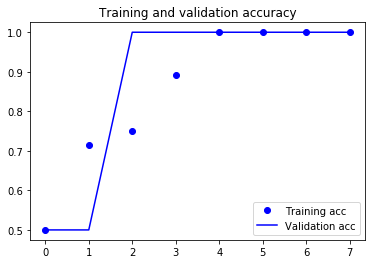

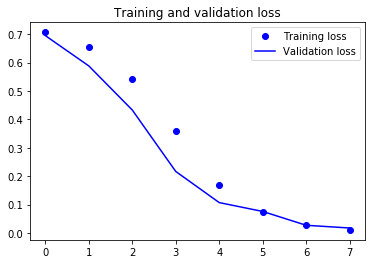

In [257]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Eklemiş olduğumuz katman ve düğüm sayısındaki değişiklik model için önceki modele göre daha iyi sonuç verdi.

# 

## Epoch Sayısı Üzerinde Değişiklik Yapma

In [258]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [259]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [260]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Resimleri 200x200 piksel olcacak şekilde yeniden boyutlandır
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

Found 52 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [261]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (8, 200, 200, 3)
labels batch shape: (8,)


In [262]:
model.save('lid_battery_3.h5')

In [263]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/15
8/8 [==============================] - 16s 2s/step - loss: 0.7081 - acc: 0.4509 - val_loss: 0.6763 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 13s 2s/step - loss: 0.6461 - acc: 0.7481 - val_loss: 0.6169 - val_acc: 0.6667
Epoch 3/15
8/8 [==============================] - 12s 2s/step - loss: 0.5944 - acc: 0.7659 - val_loss: 0.5317 - val_acc: 0.6250
Epoch 4/15
8/8 [==============================] - 14s 2s/step - loss: 0.4255 - acc: 0.9531 - val_loss: 0.3427 - val_acc: 1.0000
Epoch 5/15
8/8 [==============================] - 12s 2s/step - loss: 0.3136 - acc: 0.9841 - val_loss: 0.2416 - val_acc: 1.0000
Epoch 6/15
8/8 [==============================] - 13s 2s/step - loss: 0.1407 - acc: 1.0000 - val_loss: 0.1222 - val_acc: 1.0000
Epoch 7/15
8/8 [==============================] - 13s 2s/step - loss: 0.0665 - acc: 1.0000 - val_loss: 0.0687 - val_acc: 1.0000
Epoch 8/15
8/8 [==============================] - 13s 2s/step - loss: 0.0587 - acc: 1.0000 - val_loss: 0

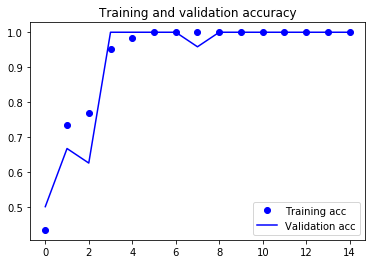

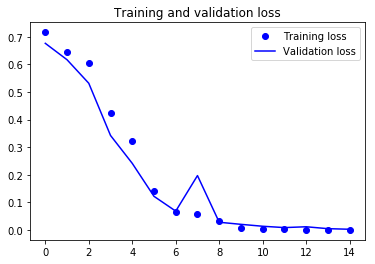

In [264]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Epoch sayısındaki artış modeli olumlu yönde etkiliyor, loss değerinini sıfıra yaklaştırıyor.

#

## Dropout

In [266]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [22]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Resimleri 200x200 piksel olcacak şekilde yeniden boyutlandır
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

Found 52 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [269]:
model.save('lid_battery_4.h5')

In [270]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/8
8/8 [==============================] - 18s 2s/step - loss: 1.1551 - acc: 0.4528 - val_loss: 0.9717 - val_acc: 0.5000
Epoch 2/8
8/8 [==============================] - 11s 1s/step - loss: 0.6611 - acc: 0.6865 - val_loss: 0.5261 - val_acc: 0.9167
Epoch 3/8
8/8 [==============================] - 11s 1s/step - loss: 0.4982 - acc: 0.6875 - val_loss: 0.4350 - val_acc: 0.9167
Epoch 4/8
8/8 [==============================] - 10s 1s/step - loss: 0.3736 - acc: 0.8413 - val_loss: 0.2932 - val_acc: 1.0000
Epoch 5/8
8/8 [==============================] - 11s 1s/step - loss: 0.2392 - acc: 1.0000 - val_loss: 0.3573 - val_acc: 0.8333
Epoch 6/8
8/8 [==============================] - 13s 2s/step - loss: 0.1561 - acc: 0.9385 - val_loss: 0.2640 - val_acc: 0.8750
Epoch 7/8
8/8 [==============================] - 12s 1s/step - loss: 0.1413 - acc: 1.0000 - val_loss: 0.1410 - val_acc: 0.9583
Epoch 8/8
8/8 [==============================] - 11s 1s/step - loss: 0.0550 - acc: 1.0000 - val_loss: 0.1054 - 

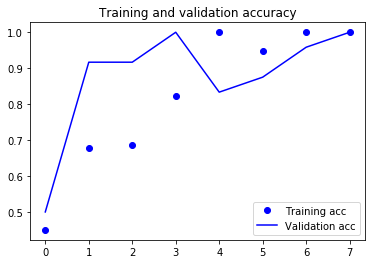

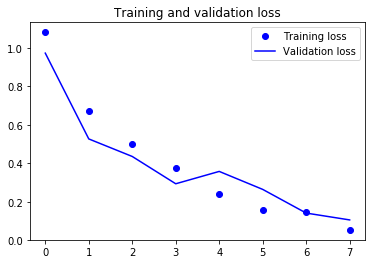

In [271]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [21]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.8))
model.add(layers.Flatten())
model.add(layers.Dropout(0.8))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=4)

Epoch 1/8
8/8 [==============================] - 13s 2s/step - loss: 0.7990 - acc: 0.5157 - val_loss: 0.6640 - val_acc: 0.5000
Epoch 2/8
8/8 [==============================] - 11s 1s/step - loss: 0.7838 - acc: 0.5019 - val_loss: 0.6464 - val_acc: 0.5000
Epoch 3/8
8/8 [==============================] - 11s 1s/step - loss: 0.6735 - acc: 0.6083 - val_loss: 0.5397 - val_acc: 1.0000
Epoch 4/8
8/8 [==============================] - 11s 1s/step - loss: 0.6299 - acc: 0.6845 - val_loss: 0.4685 - val_acc: 0.9583
Epoch 5/8
8/8 [==============================] - 11s 1s/step - loss: 0.5534 - acc: 0.7204 - val_loss: 0.5200 - val_acc: 0.5000
Epoch 6/8
8/8 [==============================] - 11s 1s/step - loss: 0.4192 - acc: 0.7991 - val_loss: 0.3029 - val_acc: 1.0000
Epoch 7/8
8/8 [==============================] - 11s 1s/step - loss: 0.3536 - acc: 0.8898 - val_loss: 0.4688 - val_acc: 0.6250
Epoch 8/8
8/8 [==============================] - 11s 1s/step - loss: 0.3697 - acc: 0.7639 - val_loss: 0.1628 - 

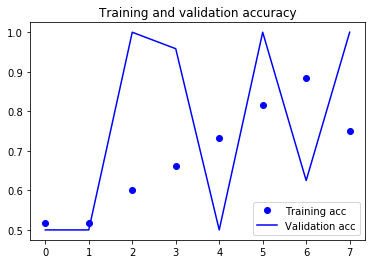

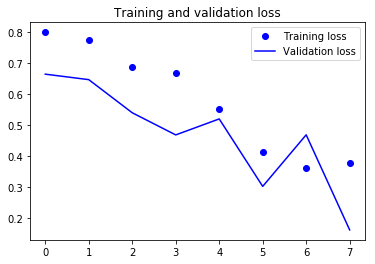

In [25]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Yapmış olduğumuz dropout işlemleri modeli olumsuz yönde etkilemektedir yani bu model için dropout'a gerek yoktur.

 #

## Data Augmentation

In [26]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

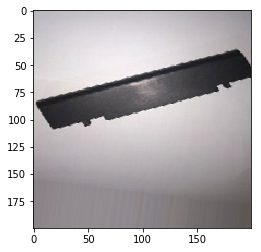

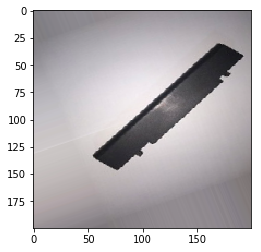

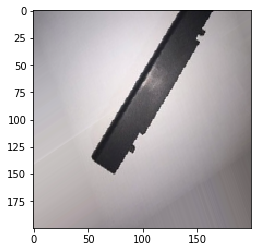

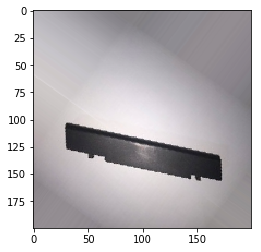

In [32]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_batterys_dir, fname) for fname in os.listdir(train_batterys_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(200, 200))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [37]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(200, 200),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=4)

Found 52 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/8
8/8 [==============================] - 16s 2s/step - loss: 0.7365 - acc: 0.6330 - val_loss: 0.6964 - val_acc: 0.5000
Epoch 2/8
8/8 [==============================] - 13s 2s/step - loss: 0.6934 - acc: 0.5257 - val_loss: 0.6733 - val_acc: 0.5000
Epoch 3/8
8/8 [==============================] - 15s 2s/step - loss: 0.6551 - acc: 0.6710 - val_loss: 0.5482 - val_acc: 0.9167
Epoch 4/8
8/8 [==============================] - 14s 2s/step - loss: 0.5524 - acc: 0.7278 - val_loss: 0.3924 - val_acc: 1.0000
Epoch 5/8
8/8 [==============================] - 13s 2s/step - loss: 0.5046 - acc: 0.8201 - val_loss: 0.3252 - val_acc: 1.0000
Epoch 6/8
8/8 [==============================] - 15s 2s/step - loss: 0.4025 - acc: 0.8608 - val_loss: 0.1792 - val_acc: 1.0000
Epoch 7/8
8/8 [==============================] - 14s 2s/step - loss: 0.2937 - acc: 0.8608 - val_loss: 0.1146 - val_acc: 1.0000
Epoch 8/8
8/8 [================

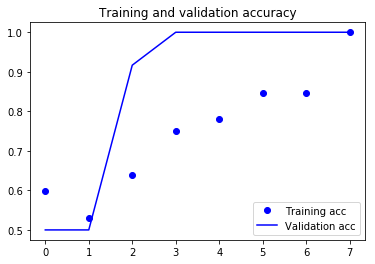

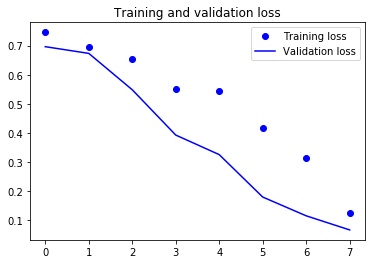

In [39]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Kullanmış olduğumuz data augmentation model üzerinde olumlu sonuç vermedi. 

 #

## Weight Regularization

In [48]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(layers.Dense(1, activation='sigmoid'))


In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [52]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Resimleri 200x200 piksel olcacak şekilde yeniden boyutlandır
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=4)

Found 52 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/8
8/8 [==============================] - 15s 2s/step - loss: 9.8997 - acc: 0.5157 - val_loss: 9.0463 - val_acc: 0.5833
Epoch 2/8
8/8 [==============================] - 14s 2s/step - loss: 8.6336 - acc: 0.6380 - val_loss: 8.1360 - val_acc: 0.5000
Epoch 3/8
8/8 [==============================] - 13s 2s/step - loss: 7.7851 - acc: 0.5176 - val_loss: 7.3490 - val_acc: 0.5000
Epoch 4/8
8/8 [==============================] - 13s 2s/step - loss: 7.0267 - acc: 0.4389 - val_loss: 6.6257 - val_acc: 0.5000
Epoch 5/8
8/8 [==============================] - 13s 2s/step - loss: 6.3260 - acc: 0.5179 - val_loss: 5.9507 - val_acc: 0.5417
Epoch 6/8
8/8 [==============================] - 13s 2s/step - loss: 5.6715 - acc: 0.5278 - val_loss: 5.3214 - val_acc: 0.5000
Epoch 7/8
8/8 [==============================] - 13s 2s/step - loss: 5.0618 - acc: 0.5176 - val_loss: 4.7382 - val_acc: 0.5000
Epoch 8/8
8/8 [================

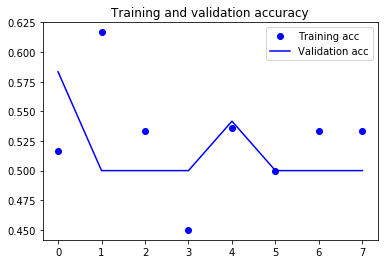

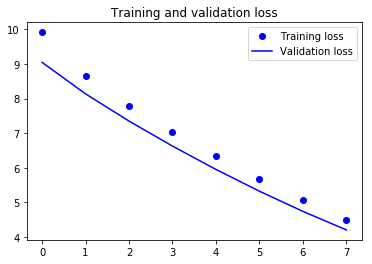

In [53]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#

In [7]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.05),
                activity_regularizer=regularizers.l1(0.05)))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        #Resimleri 200x200 piksel olcacak şekilde yeniden boyutlandır
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=8,
        class_mode='binary')
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,
      epochs=8,
      validation_data=validation_generator,
      validation_steps=4)

Found 52 images belonging to 2 classes.
Found 24 images belonging to 2 classes.
Epoch 1/8
8/8 [==============================] - 21s 3s/step - loss: 47.1727 - acc: 0.4231 - val_loss: 42.8630 - val_acc: 0.5000
Epoch 2/8
8/8 [==============================] - 15s 2s/step - loss: 40.8961 - acc: 0.4546 - val_loss: 38.5324 - val_acc: 0.5000
Epoch 3/8
8/8 [==============================] - 15s 2s/step - loss: 36.8354 - acc: 0.5176 - val_loss: 34.7487 - val_acc: 0.5000
Epoch 4/8
8/8 [==============================] - 13s 2s/step - loss: 33.1867 - acc: 0.4226 - val_loss: 31.2278 - val_acc: 0.4167
Epoch 5/8
8/8 [==============================] - 13s 2s/step - loss: 29.7552 - acc: 0.4843 - val_loss: 27.8958 - val_acc: 0.4167
Epoch 6/8
8/8 [==============================] - 13s 2s/step - loss: 26.5119 - acc: 0.4407 - val_loss: 24.7482 - val_acc: 0.4167
Epoch 7/8
8/8 [==============================] - 13s 2s/step - loss: 23.4416 - acc: 0.4056 - val_loss: 21.7987 - val_acc: 0.4583
Epoch 8/8
8/8 [==

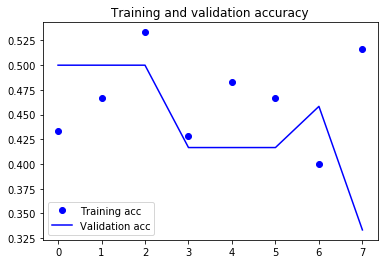

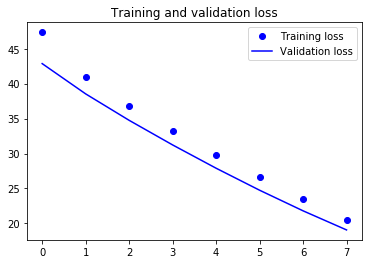

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Yapmış olduğumuz ağırlık regularizasyonundan sonra ağırlığın(W) artması model üzerinde olumsuz etki yaptığını söyleyebiliriz. Loss değeri aşarı derece yükseldi. Loss değerini düşürmek için ağırlığı daha düşük girmemiz gerekmektedir.

#

### Overfitting sorununu çözmek için ayrıca dataset de büyütülebilir.